**Mariana Maroto**<br>
Data Mining Homework 1<br>
Cryptos Graph<br>
Description: Compare most popular crypto currencies over the last 5 years. Determine which one would have been a better investment. Currently Dogecoin has higher rate of return but it is highly volatile. 


In [7]:
# Download Cryptos Trading Data
import pandas as pd
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'

cryptos = ['BTC', 'DOGE', 'ETH'] # select which cryptocurrencies would you like to obtain data for
cryptos_dict_datasets = {}
for i in cryptos:
  rstring = '?fsym=' + i + '&tsym=USD&limit=2000'
  res = requests.get(endpoint + rstring)
  cryptos_dict_datasets[i] = pd.DataFrame(json.loads(res.content)['Data'])
  cryptos_dict_datasets[i] = cryptos_dict_datasets[i].set_index('time')
  cryptos_dict_datasets[i].index = pd.to_datetime(cryptos_dict_datasets[i].index, unit='s')

In [8]:
# Show last three days Bitcoin
cryptos_dict_datasets['BTC'].tail(3)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-03-06,49185.32,47099.07,48775.37,25116.42,1.214195e+09,48892.80,direct,
2021-03-07,51455.54,48892.80,48892.80,28513.09,1.434652e+09,50964.18,direct,
2021-03-08,51830.47,49341.09,50964.18,188984.33,2.179851e+09,50941.11,direct,


In [9]:
# Show last three days Dogecoin
cryptos_dict_datasets['DOGE'].tail(3)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-03-06,0.05257,0.04920,0.04963,1.850057e+08,9.448776e+06,0.05110,direct,
2021-03-07,0.05237,0.05052,0.05110,8.119947e+07,4.171155e+06,0.05210,direct,
2021-03-08,0.05997,0.05161,0.05210,6.105959e+09,3.693961e+08,0.05619,direct,


In [10]:
# Show last three days Etherium
cryptos_dict_datasets['ETH'].tail()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-03-04,1625.02,1505.61,1568.65,657432.27,1.023294e+09,1538.37,direct,
2021-03-05,1549.35,1443.48,1538.37,708293.26,1.053353e+09,1529.75,direct,
2021-03-06,1670.56,1514.50,1529.75,730694.87,1.162130e+09,1651.48,direct,
2021-03-07,1734.52,1631.59,1651.48,449616.47,7.504509e+08,1726.33,direct,
2021-03-08,1755.43,1666.76,1726.33,388668.03,6.687731e+08,1742.77,direct,


Text(0.5, 0, 'Year')

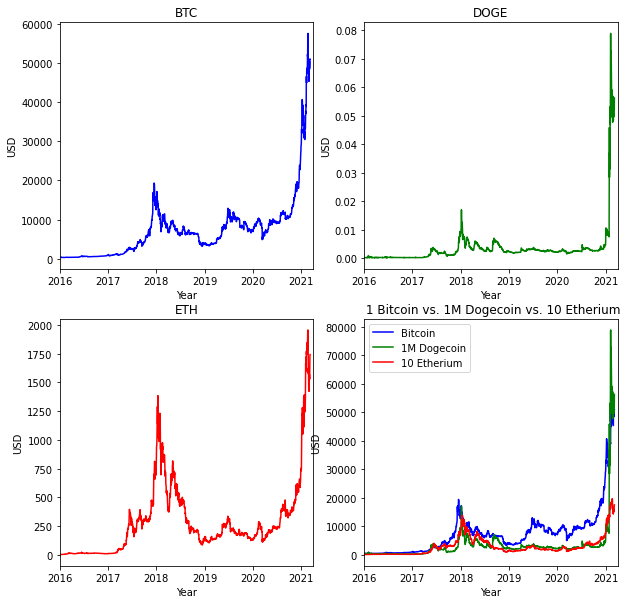

In [13]:
# Show growth of each cryptocurrency side by side
import matplotlib.pyplot as plt
from datetime import datetime
fig = plt.figure(figsize=(10, 10))

x = 1
colors_dic = {'BTC':'b','DOGE':'g','ETH':'r'}
for i in cryptos:
  ax = fig.add_subplot(2, 2, x)
  ax.plot(cryptos_dict_datasets[i].index, cryptos_dict_datasets[i]['close'], colors_dic[i])
  ax.set_title(i)
  ax.set_xlim([datetime(2016, 1, 1), datetime(2021, 4, 1)])
  ax.set_ylabel('USD')
  ax.set_xlabel('Year')
  x = x + 1

BTC = cryptos_dict_datasets['BTC']
DOGE = cryptos_dict_datasets['DOGE']
ETH = cryptos_dict_datasets['ETH']
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(BTC.index, BTC['close'], label = "Bitcoin", color = 'b')
ax4.plot(DOGE.index, DOGE['close']*1000000, label = 'Dogecoin*e^6', color = 'g')
ax4.plot(ETH.index, ETH['close']*10, label = 'Etherium*10', color = 'r')
ax4.set_xlim([datetime(2016, 1, 1), datetime(2021, 4, 1)])
ax4.legend(['Bitcoin', '1M Dogecoin', '10 Etherium'])
ax4.set_title(" 1 Bitcoin vs. 1M Dogecoin vs. 10 Etherium")
ax4.set_ylabel('USD')
ax4.set_xlabel('Year')